### Number of images to generate

In [1]:
n = 10

### Path to images

In [2]:
path = './Cover/'

### Imports

In [3]:
import rawpy
import numpy as np

from imageio import imwrite, imread
import cv2 # pip install opencv-python
from PIL import Image as ImagePIL

from jpeg import jpeg
from scipy.fftpack import dct, idct
import skimage.io
import os

from multiprocessing import cpu_count
from multiprocessing.pool import ThreadPool as Pool

from time import time

import matplotlib.pyplot as plt

[pysteg.jpeg] $Id: __init__.py 2204 2011-04-05 11:43:38Z georg $


In [4]:
# Postprocess parameters
params = rawpy.Params(rawpy.DemosaicAlgorithm.LINEAR, half_size=False, four_color_rgb=False, use_camera_wb=False, \
                      use_auto_wb=False, user_wb=(1,1,1,1), output_color=rawpy.ColorSpace.raw, output_bps=16, \
                      user_flip=None, user_black=0, user_sat=None, no_auto_bright=True, auto_bright_thr=None, \
                      adjust_maximum_thr=0.0, bright=1.0, highlight_mode=rawpy.HighlightMode.Clip, exp_shift=None, \
                      exp_preserve_highlights=0.0, no_auto_scale=False, gamma=(1,1), chromatic_aberration=None, \
                      bad_pixels_path=None)

"""
params = rawpy.Params(rawpy.DemosaicAlgorithm.LINEAR, half_size=False, four_color_rgb=False, use_camera_wb=False, \
                      use_auto_wb=False, user_wb=(1,1,1,1), output_color=rawpy.ColorSpace.raw, output_bps=16, \
                      user_flip=None, user_black=0, user_sat=None, no_auto_bright=True, auto_bright_thr=None, \
                      adjust_maximum_thr=0.0, bright=1.0, highlight_mode=rawpy.HighlightMode.Clip, exp_shift=None, \
                      exp_preserve_highlights=0.0, no_auto_scale=False, gamma=(2.222, 4.5), chromatic_aberration=None, \
                      bad_pixels_path=None)
"""

'\nparams = rawpy.Params(rawpy.DemosaicAlgorithm.LINEAR, half_size=False, four_color_rgb=False, use_camera_wb=False,                       use_auto_wb=False, user_wb=(1,1,1,1), output_color=rawpy.ColorSpace.raw, output_bps=16,                       user_flip=None, user_black=0, user_sat=None, no_auto_bright=True, auto_bright_thr=None,                       adjust_maximum_thr=0.0, bright=1.0, highlight_mode=rawpy.HighlightMode.Clip, exp_shift=None,                       exp_preserve_highlights=0.0, no_auto_scale=False, gamma=(2.222, 4.5), chromatic_aberration=None,                       bad_pixels_path=None)\n'

### Classes

In [5]:
class conf(object):
    class generate(object):
        class NS(object):
            class jpeg(object):
                pass
            class dev(object):
                pass
            class mono(object):
                pass
    class embed(object):
        class NS(object):
            class a(object):
                pass
            class b(object):
                pass
        class stego_path:
            pass
        class cover_path:
            pass

    class imgs(object):
        class QF(object):
            pass

### Conversion functions

In [6]:
def raw_to_jpeg_python(raw,imagefile):
    
    QF = conf.imgs.QF
    
    rgb = raw.postprocess(params)
    
    if rgb.shape[2] == 4:
        rgb = cv2.cvtColor(rgb, cv2.COLOR_RGBA2RGB)
    
    if not conf.generate.NS.mono :
        imwrite(imagefile+'.tiff', rgb)        
        img = ImagePIL.open(imagefile+'.tiff')
        im_grey = img.convert('L')
    else:
        im_grey = ImagePIL.fromarray(rgb[:,:,0])
        im_grey.mode = 'I'
        im_grey = im_grey.point(lambda i:i*(1./256)).convert('L')
        
    h, w = im_grey.size

    factor = min(h,w) / 512
    x = int(h/factor)
    y = int(w/factor)

    im_grey = im_grey.resize((x, y))

    if x > y: # Photo paysage
        im_grey = im_grey.crop(((x-512)/2, 0, (x-512)/2 + 512, 512))

    else: # Photo portrait
        im_grey = im_grey.crop((0, (y-512)/2, 512, (y-512)/2 + 512))
    
    im_grey.save(imagefile + '.jpg', quality = QF)
    
    if not conf.generate.NS.mono :
        os.remove(imagefile+'.tiff')

### Create pseudo cover image n° i

In [7]:
def make_pseudo_cover(i):
    
    print(i)
    
    seed = hash(cover_file[-9:-4])%(2**32-i)

    np.random.seed(seed)

    sens_noise = np.random.randn(h, h) * var_pseudo_cover_signal

    im_pseudo_cover = im_cover[:,debut:fin] + sens_noise

    im_pseudo_cover[im_pseudo_cover>lvl_max]=lvl_max
    im_pseudo_cover[im_pseudo_cover<0]=0
    
    raw_im.raw_image_visible[:,debut:fin] = im_pseudo_cover

    base_name = os.path.basename(cover_file)
    pseudo_cover_file = conf.embed.pseudo_cover_path + base_name[0:-4] + '_' + str(i)
    
    raw_to_jpeg_python(raw_im, pseudo_cover_file)

### Generate n images

In [8]:
def generate(n):

    t = time()
    
    nb_cores = cpu_count()
    pool = Pool(nb_cores)
    
    pool.map(make_pseudo_cover, range(n))
    pool.close()
    pool.join()
                
    print("Temps :", time() - t)

#### File names (path)

In [9]:
files_list = os.listdir(path)
print(files_list)

['4468.cr2', '4959.pef', 'Mono4.DNG', 'Mono5.DNG', 'Mono1.DNG', '3280.cr2', '6934.nef', '4750.cr2', 'Mono3.DNG', 'Mono2.DNG', 'RAW_CANON_PRO70_SRGB.CRW']


Calcul du temps

In [10]:
u = time()

#### 4468.cr2

4468.cr2
01
2
3

4
56
7

8
9
Temps : 7.0187859535217285


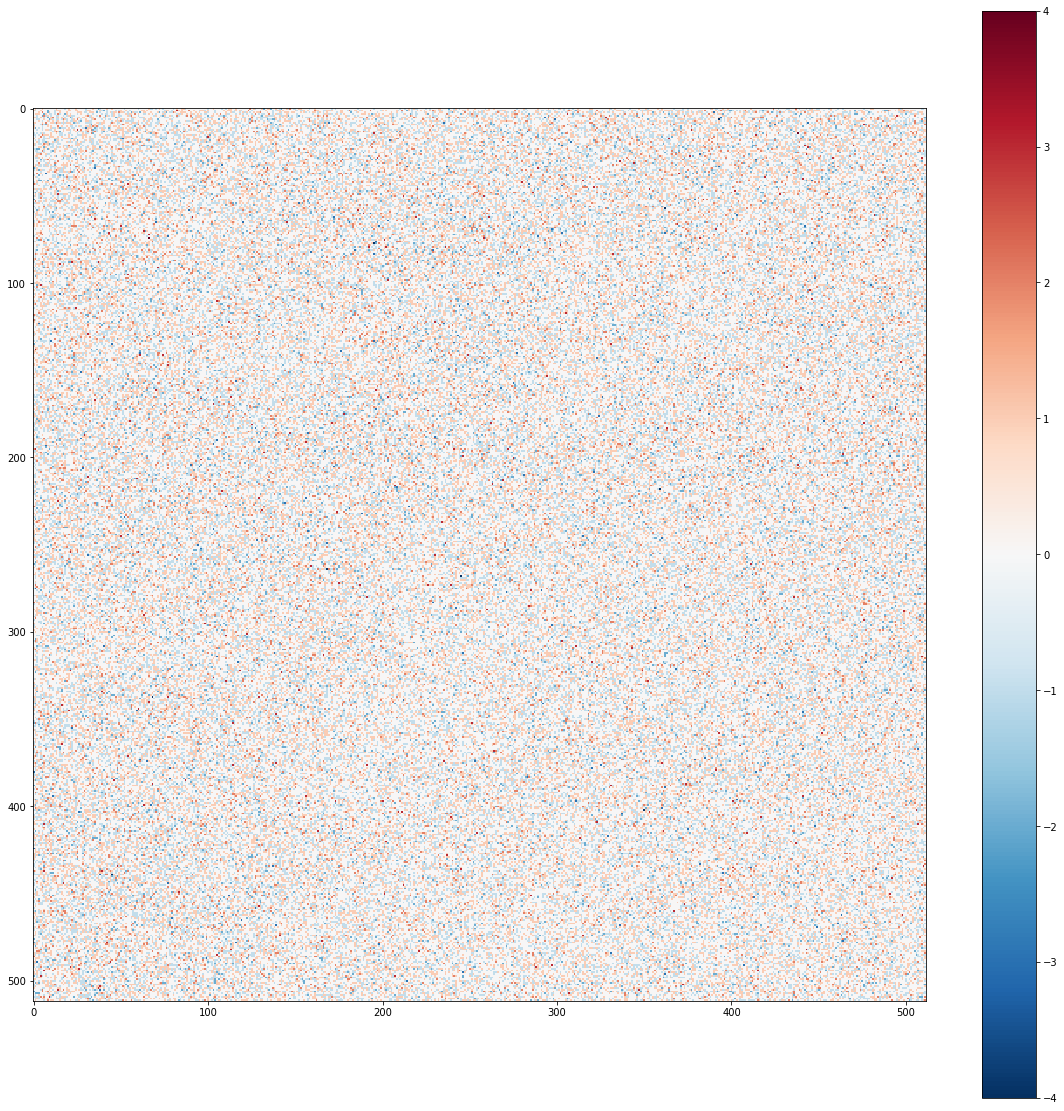

In [11]:
file = '4468.cr2'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = False
conf.embed.NS.a = 0.5 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal < 0] = 0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 

im_0 = im_0.astype('float')
im_1 = im_1.astype('float')

plt.figure(figsize = (20, 20))
DIFF = im_0 - im_1
val_max = np.max(np.abs(im_0 - im_1))
plt.imshow(DIFF, cmap='RdBu_r', vmax = val_max, vmin = -val_max)
plt.colorbar()

#### 4959.pef

4959.pef
01
23
4

5

67

8
9
Temps : 6.7497711181640625


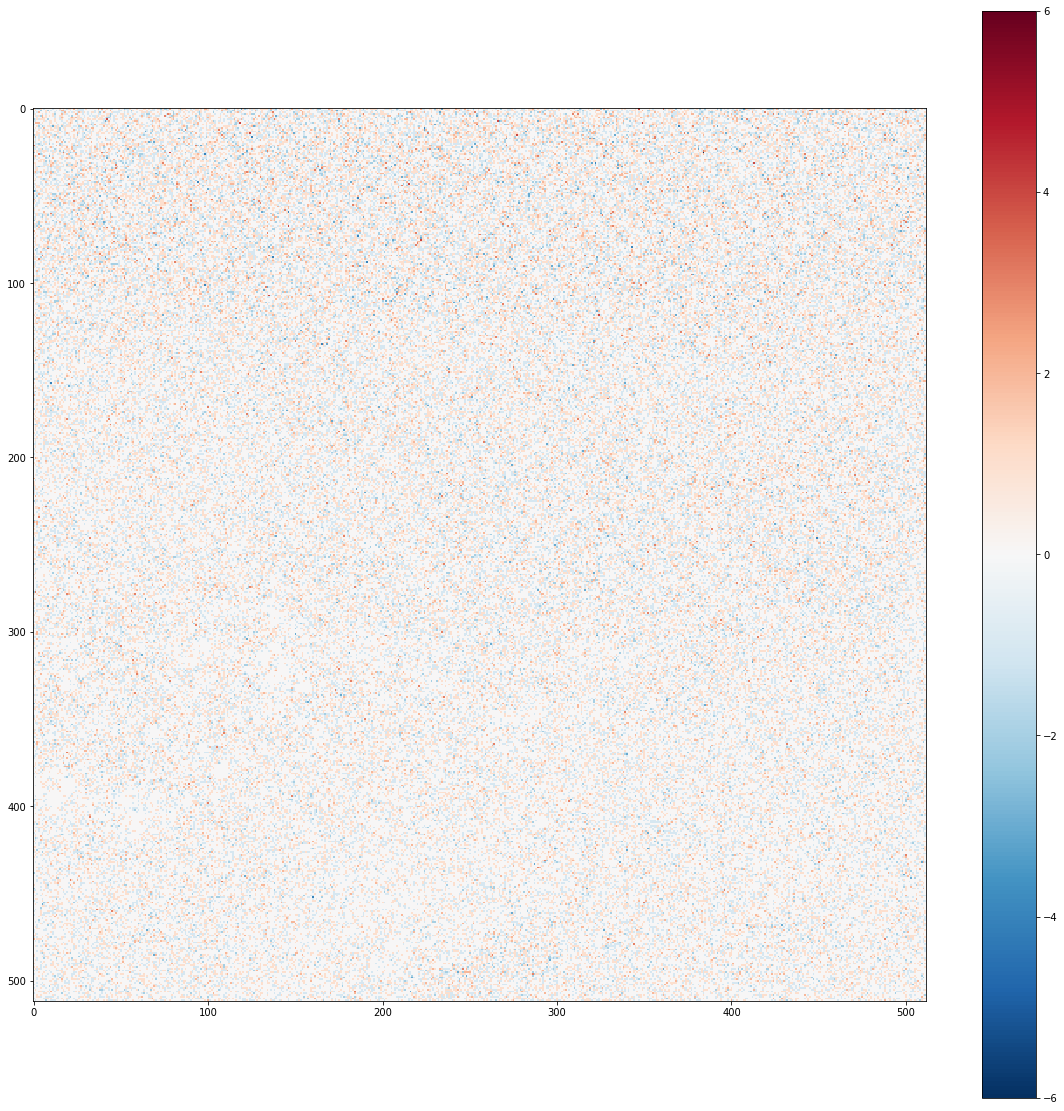

In [12]:
file = '4959.pef'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = False
conf.embed.NS.a = 0.3 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 

im_0 = im_0.astype('float')
im_1 = im_1.astype('float')

plt.figure(figsize = (20, 20))
DIFF = im_0 - im_1 #
val_max = np.max(np.abs(im_0 - im_1))
plt.imshow(DIFF, cmap='RdBu_r', vmax = val_max, vmin = -val_max)
plt.colorbar()

#### Mono4.DNG

Mono4.DNG
01
2
3
45

6
7

8
9
Temps : 4.591500282287598


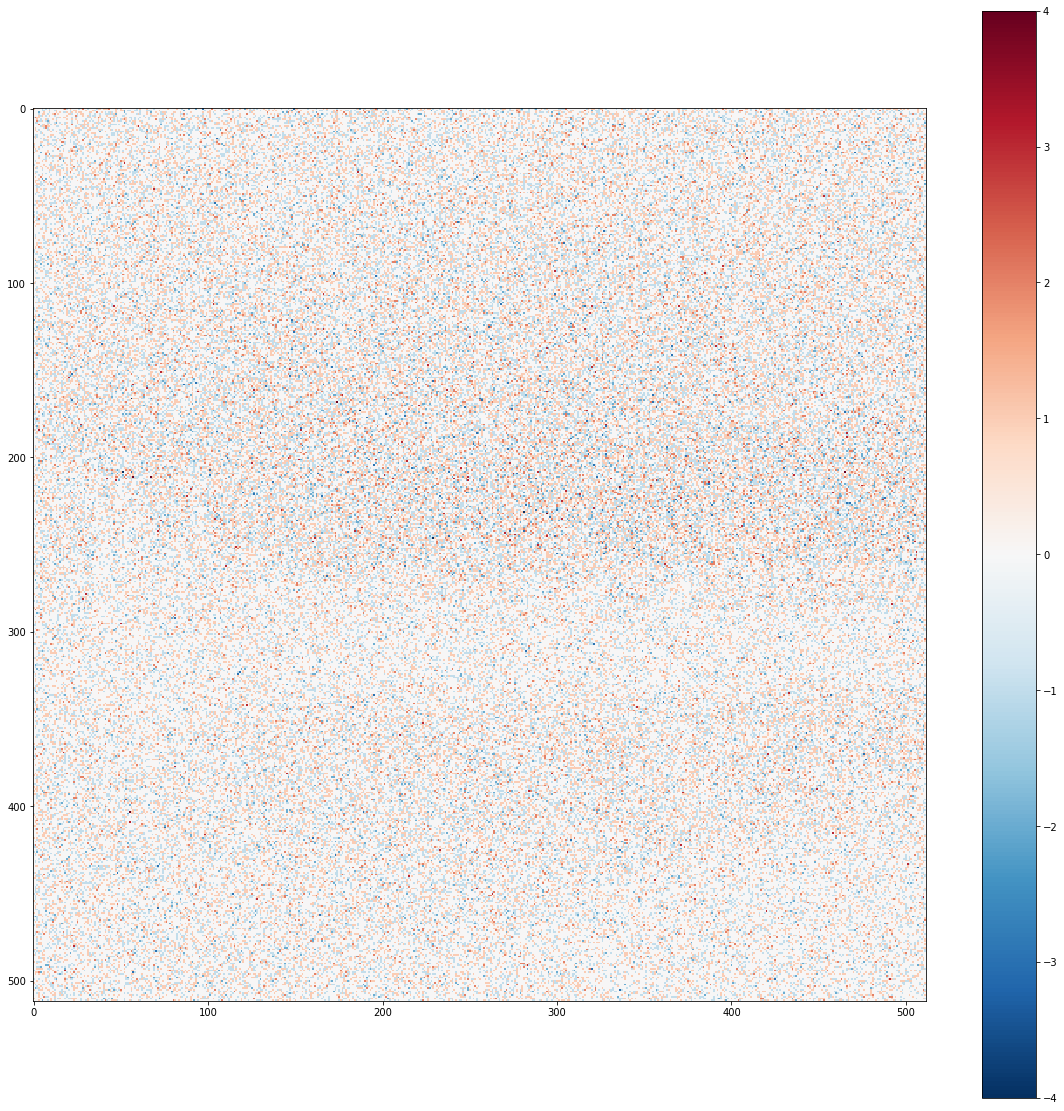

In [13]:
file = 'Mono4.DNG'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = True
conf.embed.NS.a = 0.5 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 
im_0 = im_0.astype('float')
im_1 = im_1.astype('float')

plt.figure(figsize = (20, 20))
DIFF = im_0 - im_1 #
val_max = np.max(np.abs(im_0 - im_1))
plt.imshow(DIFF, cmap='RdBu_r', vmax = val_max, vmin = -val_max)
plt.colorbar()

#### Mono5.DNG

Mono5.DNG
01
2
3

45
6
7

8
9
Temps : 5.122346878051758


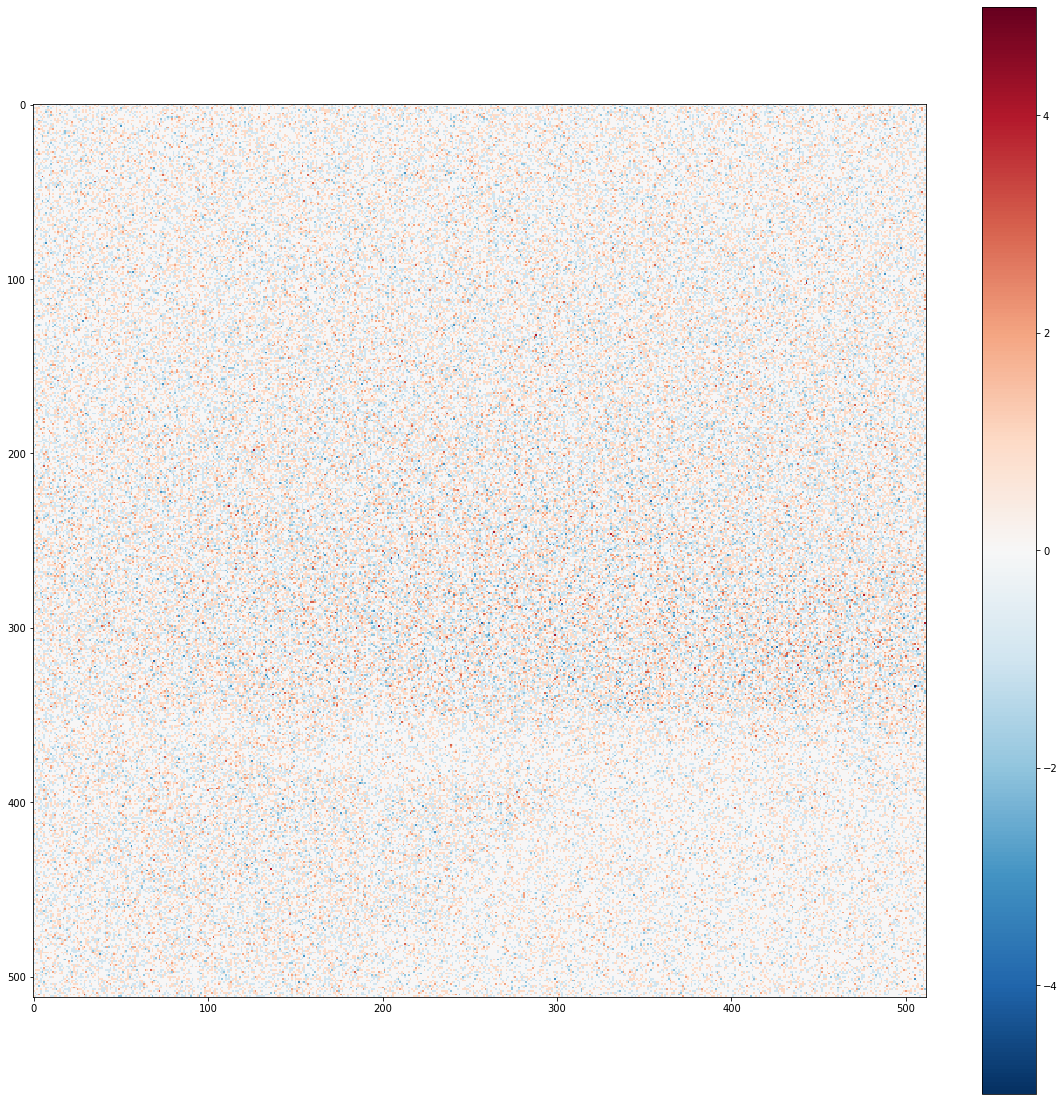

In [14]:
file = 'Mono5.DNG'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = True
conf.embed.NS.a = 0.5 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 

im_0 = im_0.astype('float')
im_1 = im_1.astype('float')

plt.figure(figsize = (20, 20))
DIFF = im_0 - im_1 #
val_max = np.max(np.abs(im_0 - im_1))
plt.imshow(DIFF, cmap='RdBu_r', vmax = val_max, vmin = -val_max)
plt.colorbar()

#### Mono1.DNG

Mono1.DNG
01
2
3
4
5
6
7

8
9
Temps : 4.717059850692749


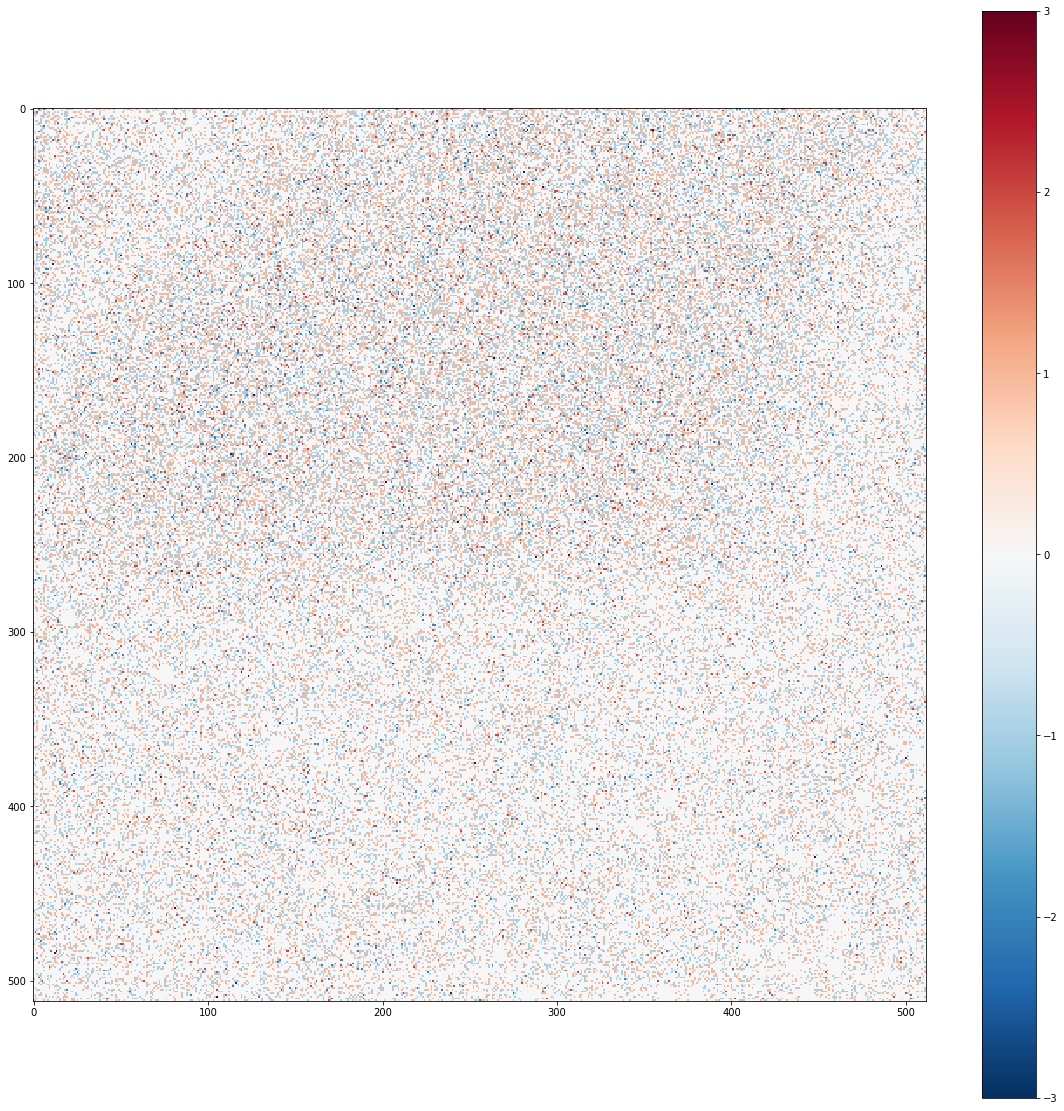

In [15]:
file = 'Mono1.DNG'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = True
conf.embed.NS.a = 0.05 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 

im_0 = im_0.astype('float')
im_1 = im_1.astype('float')

plt.figure(figsize = (20, 20))
DIFF = im_0 - im_1 #
val_max = np.max(np.abs(im_0 - im_1))
plt.imshow(DIFF, cmap='RdBu_r', vmax = val_max, vmin = -val_max)
plt.colorbar()

#### 3280.cr2

3280.cr2
01
2
3
4
5
6

7
8
9
Temps : 6.589006662368774


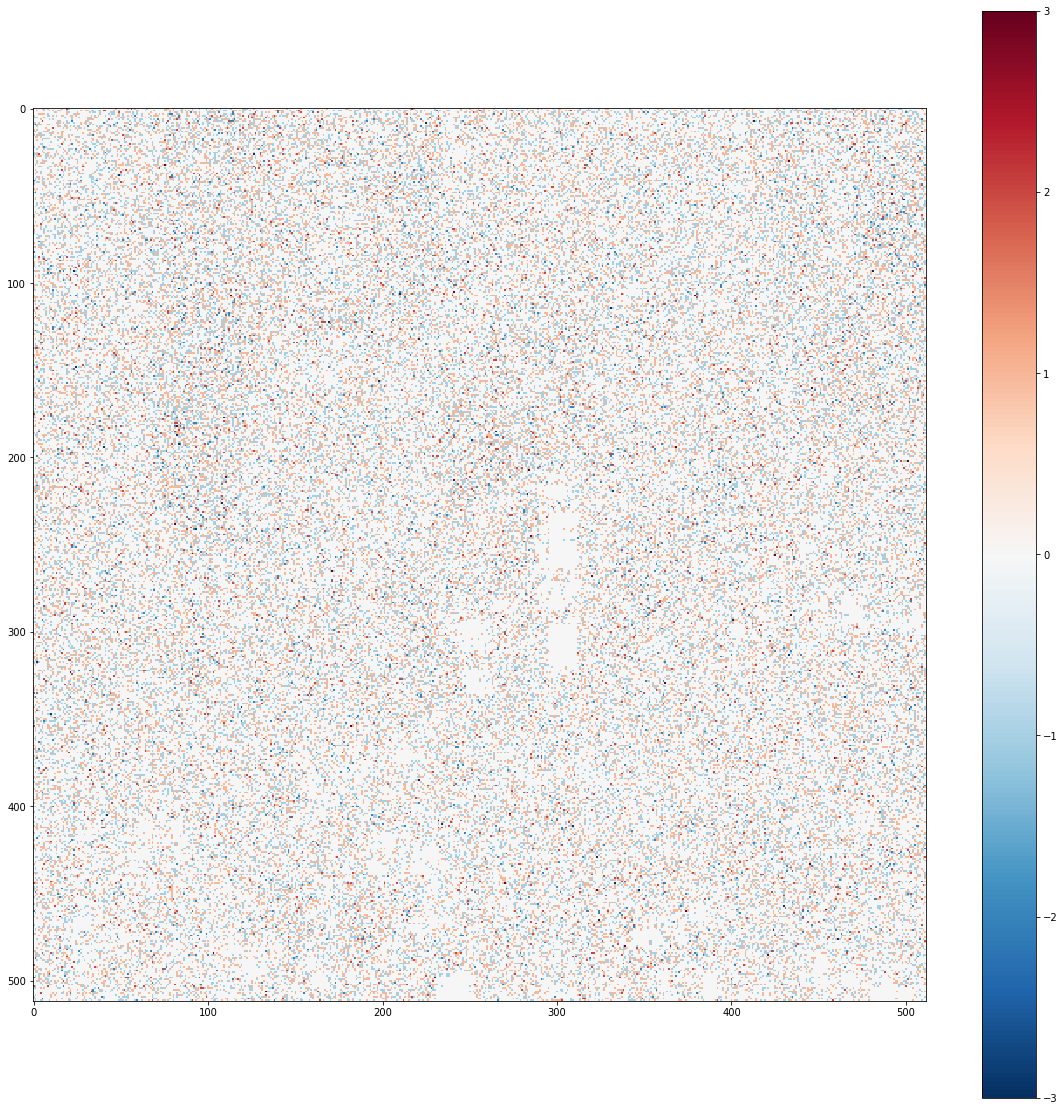

In [16]:
file = '3280.cr2'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = False
conf.embed.NS.a = 0.1 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg')  

im_0 = im_0.astype('float')
im_1 = im_1.astype('float')

plt.figure(figsize = (20, 20))
DIFF = im_0 - im_1 #
val_max = np.max(np.abs(im_0 - im_1))
plt.imshow(DIFF, cmap='RdBu_r', vmax = val_max, vmin = -val_max)
plt.colorbar()

#### 6934.nef

6934.nef
01
2
3
4
5
6
7

8
9
Temps : 3.279491424560547


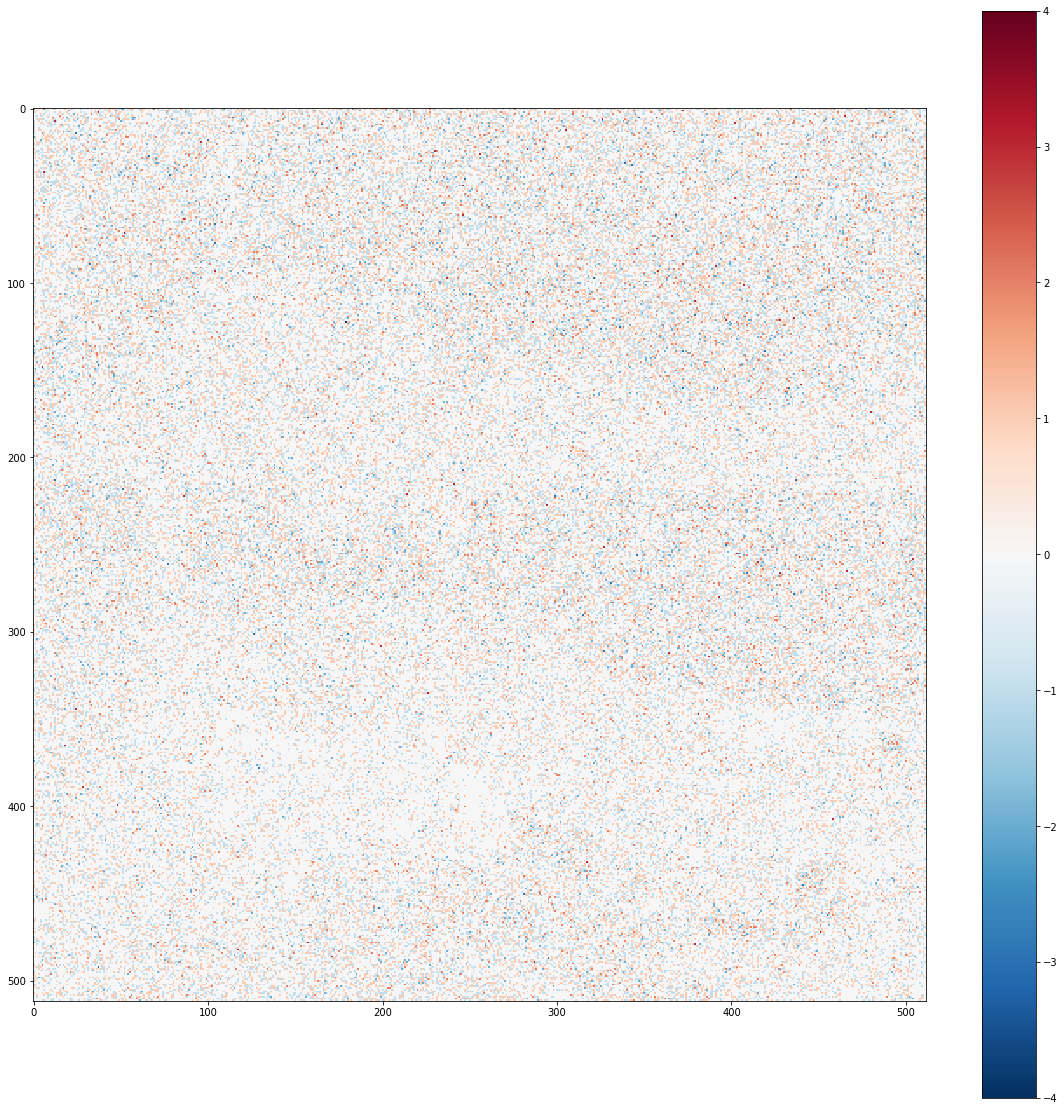

In [17]:
file = '6934.nef'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = False
conf.embed.NS.a = 0.05 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 

im_0 = im_0.astype('float')
im_1 = im_1.astype('float')

plt.figure(figsize = (20, 20))
DIFF = im_0 - im_1 #
val_max = np.max(np.abs(im_0 - im_1))
plt.imshow(DIFF, cmap='RdBu_r', vmax = val_max, vmin = -val_max)
plt.colorbar()

#### 4750.cr2

4750.cr2
01
23
4

5
6
7

8
9
Temps : 5.808420896530151


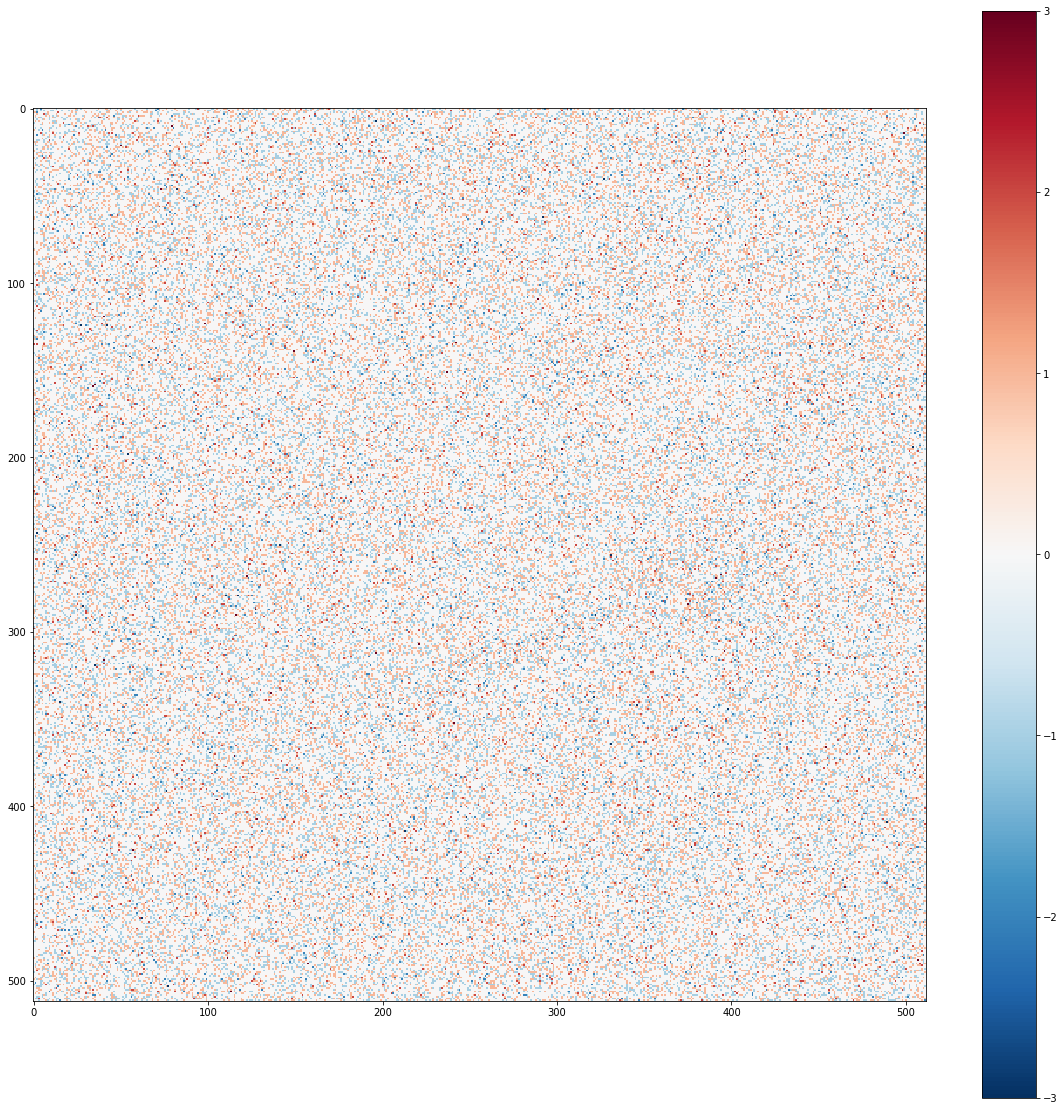

In [18]:
file = '4750.cr2'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = False
conf.embed.NS.a = 0.1 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg')  

im_0 = im_0.astype('float')
im_1 = im_1.astype('float')

plt.figure(figsize = (20, 20))
DIFF = im_0 - im_1 #
val_max = np.max(np.abs(im_0 - im_1))
plt.imshow(DIFF, cmap='RdBu_r', vmax = val_max, vmin = -val_max)
plt.colorbar()

#### Mono3.DNG

Mono3.DNG
01
23
4

5
6
7

8
9
Temps : 5.205966472625732


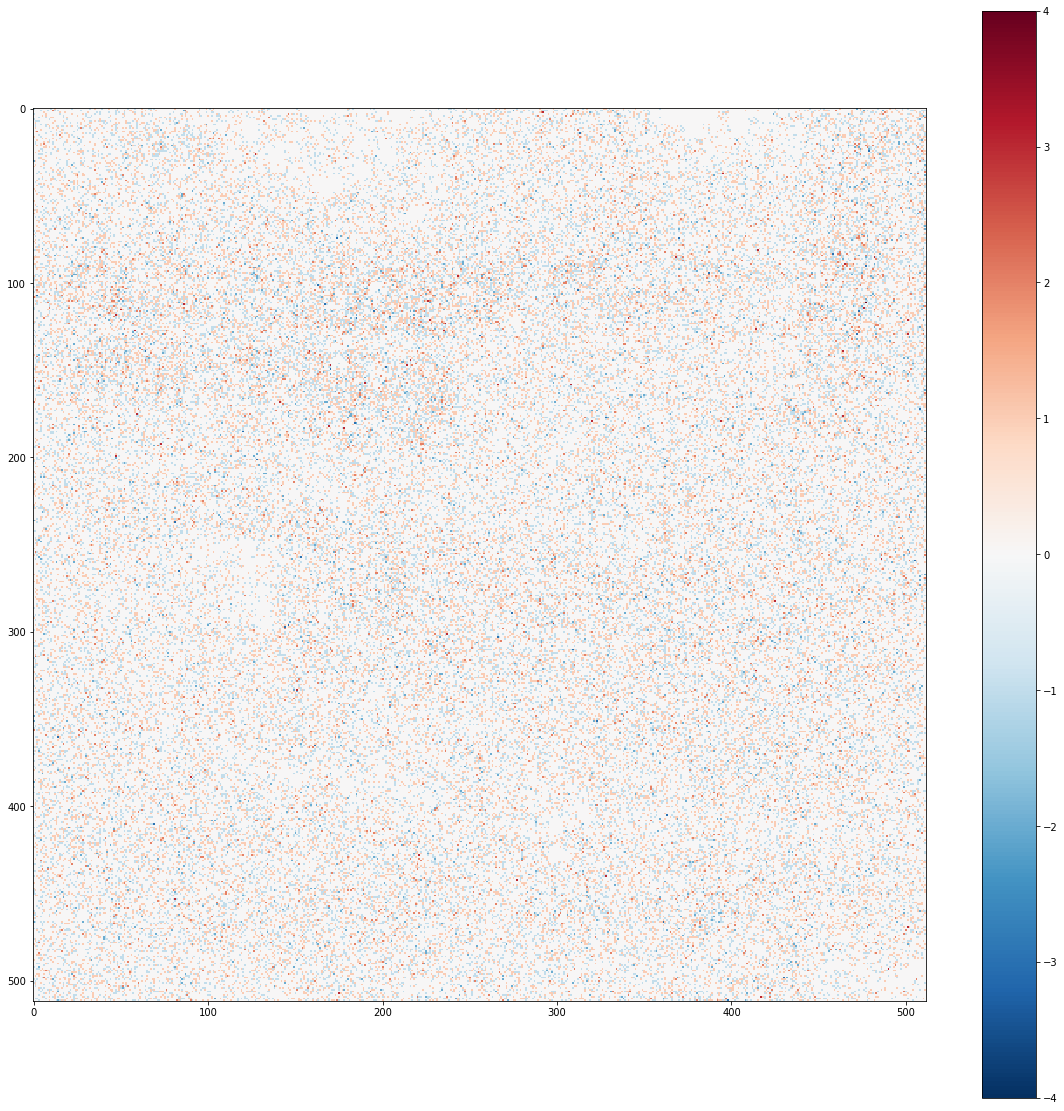

In [19]:
file = 'Mono3.DNG'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = True
conf.embed.NS.a = 0.1 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 

im_0 = im_0.astype('float')
im_1 = im_1.astype('float')

plt.figure(figsize = (20, 20))
DIFF = im_0 - im_1 #
val_max = np.max(np.abs(im_0 - im_1))
plt.imshow(DIFF, cmap='RdBu_r', vmax = val_max, vmin = -val_max)
plt.colorbar()

#### Mono2.DNG

Mono2.DNG
01
2
3
4
5
6
7

8
9
Temps : 4.746182441711426


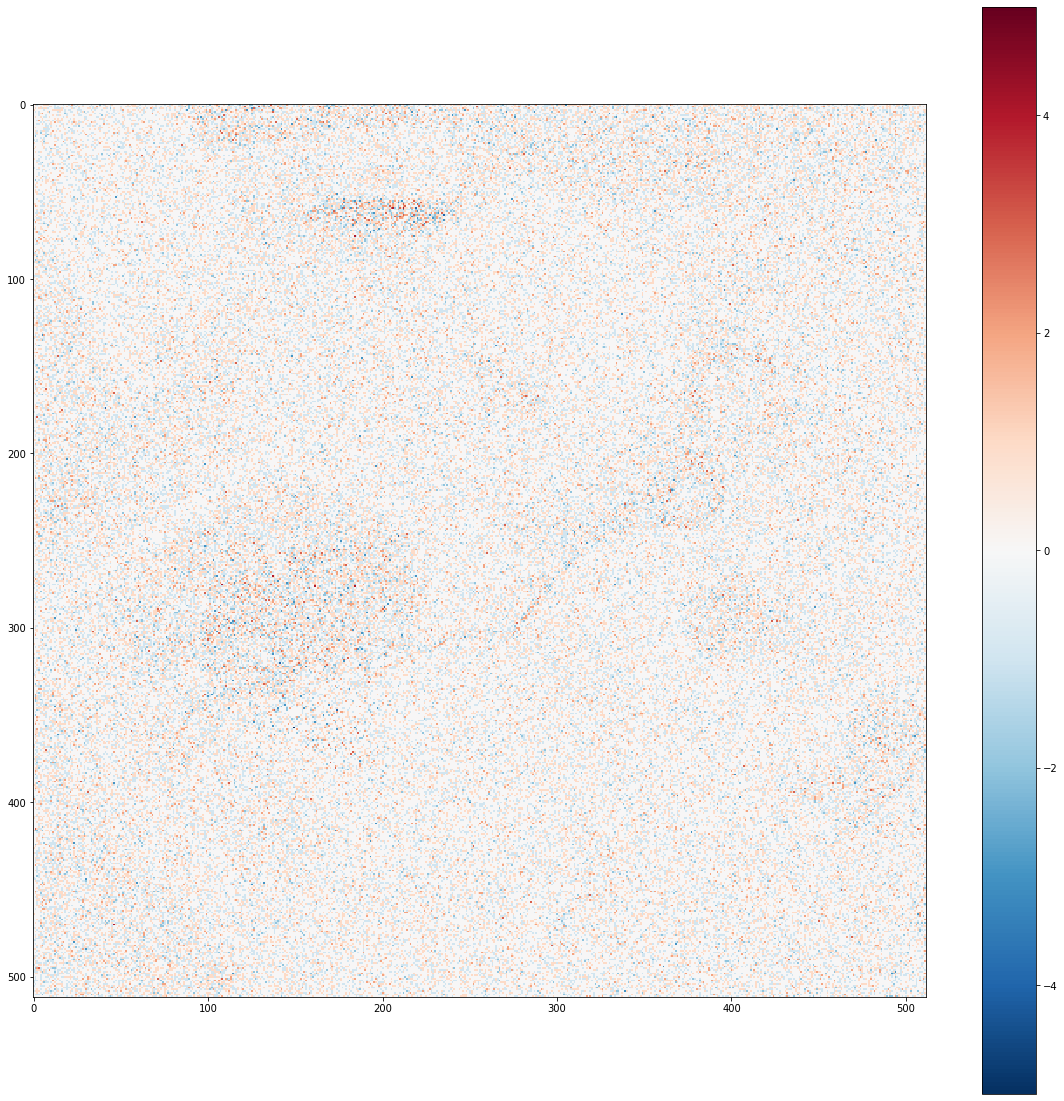

In [20]:
file = 'Mono2.DNG'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = True
conf.embed.NS.a = 0.3 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 

im_0 = im_0.astype('float')
im_1 = im_1.astype('float')

plt.figure(figsize = (20, 20))
DIFF = im_0 - im_1 #
val_max = np.max(np.abs(im_0 - im_1))
plt.imshow(DIFF, cmap='RdBu_r', vmax = val_max, vmin = -val_max)
plt.colorbar()

In [21]:
print("Temps total :", time() - u)

Temps total : 63.087438344955444


#### RAW_CANON_PRO70_SRGB.CRW

RAW_CANON_PRO70_SRGB.CRW
01
2
3
456



7
8
9
Temps : 1.490041732788086


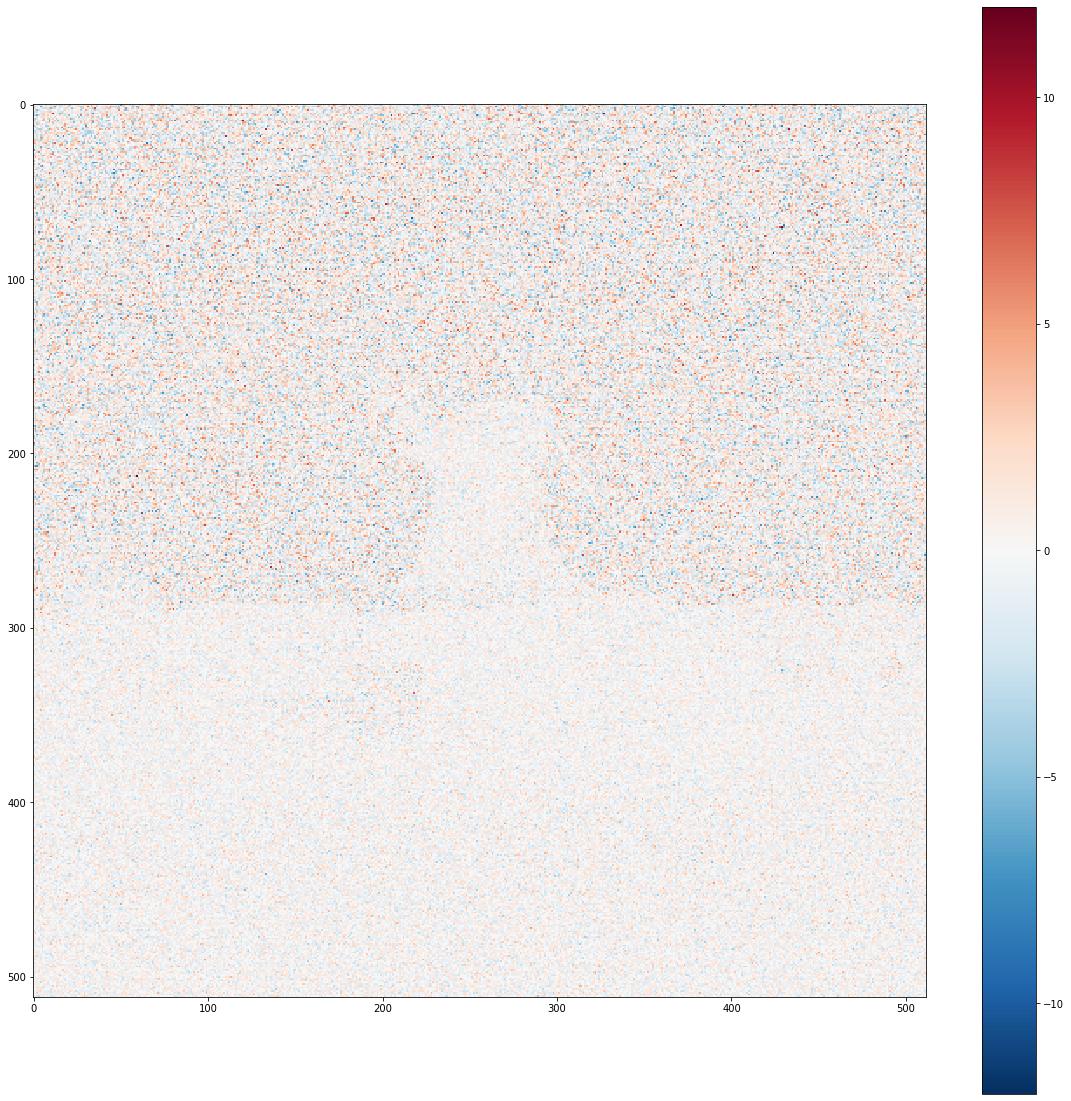

In [22]:
file = 'RAW_CANON_PRO70_SRGB.CRW'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = False
conf.embed.NS.a = 0.3 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 

im_0 = im_0.astype('float')
im_1 = im_1.astype('float')

plt.figure(figsize = (20, 20))
DIFF = im_0 - im_1 #
val_max = np.max(np.abs(im_0 - im_1))
plt.imshow(DIFF, cmap='RdBu_r', vmax = val_max, vmin = -val_max)
plt.colorbar()